# 911 Calls Project

For this capstone project we will be analyzing some 911 call data from __[Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert?resource=download)__  The data contains the following fields:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 50)

In [36]:
data = pd.read_csv("data/911.csv")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [40]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## checking Null Values

In [47]:
data.isna().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

# the top 5 zipcodes for 911 calls?

In [54]:
data['zip'].value_counts().head()

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

# the top 5 townships (twp) for 911 calls?

In [59]:
data['twp'].value_counts().head()


twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

#  how many unique title codes are there?

In [70]:
# data['title'].unique()
data['title'].nunique()

148

# Creating new features

The titles column contains "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I'll use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

In [76]:
data['reason'] = data['title'].apply(lambda title: title.split(":")[0])

In [78]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


##  What is the most common Reason for a 911 call based off of this new column?

In [89]:
data['reason'].value_counts()

reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

<Axes: xlabel='reason', ylabel='count'>

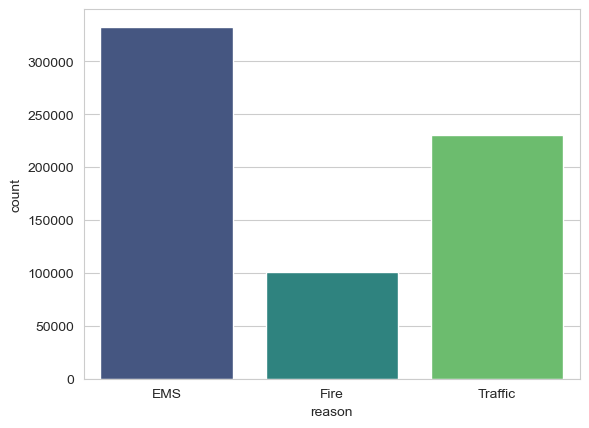

In [95]:
sns.countplot(x = "reason", data = data , palette="viridis", hue="reason")

### Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [107]:
type(data['timeStamp'].iloc[0])

str

 Use pd.to_datetime to convert the column from strings to DateTime objects

In [110]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [112]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [114]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [116]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


#### Notice how the Day of Week is an integer 0-6. I'll use the .map() with this dictionary to map the actual string names to the day of the week

In [127]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

In [129]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu


### Now I use seaborn to create a countplot of the `Day of Week` column with the hue based off of the Reason column.

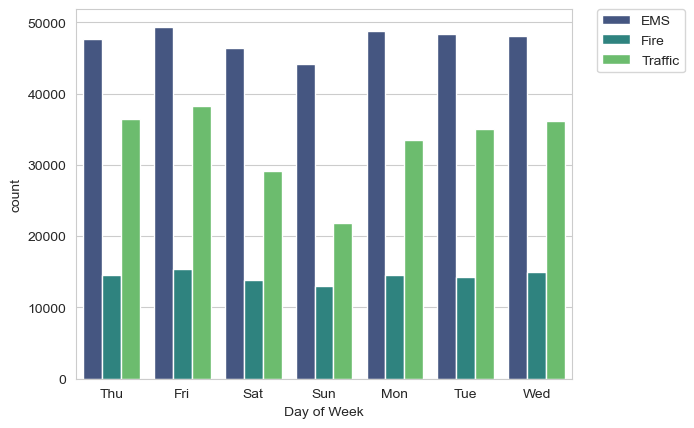

In [137]:
sns.countplot(x="Day of Week", data = data, hue = "reason", palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Now do the same for Month:

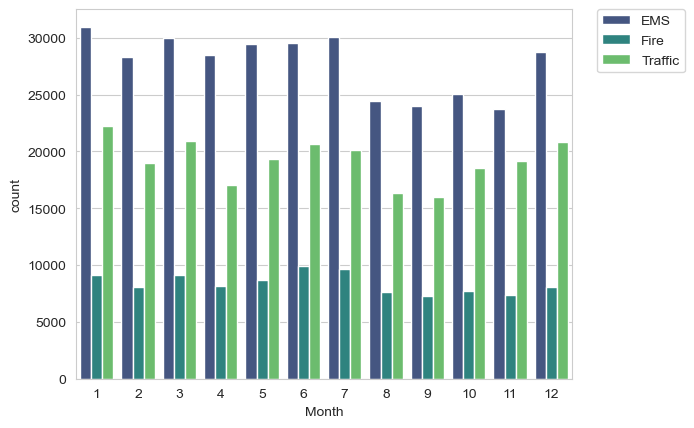

In [145]:
sns.countplot(x='Month',data=data,hue='reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [161]:
data.shape

(663522, 13)

In [165]:
data.isna().sum()

lat                0
lng                0
desc               0
zip            80199
title              0
timeStamp          0
twp              293
addr               0
e                  0
reason             0
Hour               0
Month              0
Day of Week        0
dtype: int64

In [167]:
byMonth = data.groupby('Month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


## Now create a simple plot off of the dataframe indicating the count of calls per month.

<Axes: xlabel='Month'>

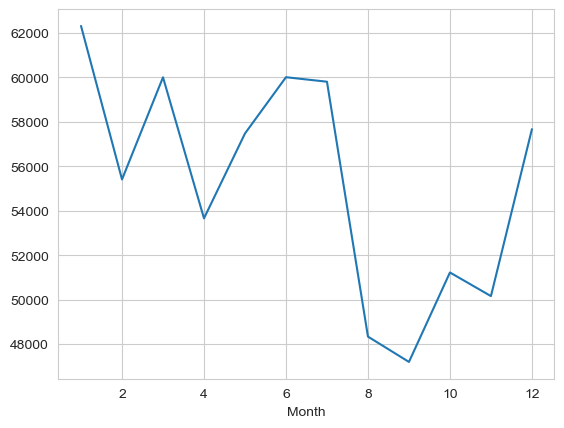

In [172]:
# Could be any column
byMonth['twp'].plot()

<Axes: xlabel='Month'>

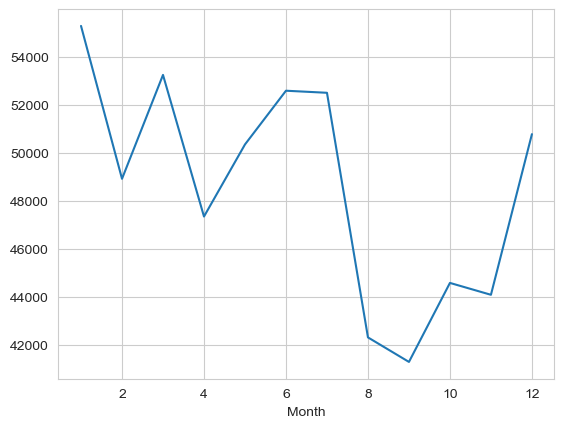

In [174]:
# same with zip
# Could be any column
byMonth['zip'].plot()

### Now see if I can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind we may need to reset the index to a column

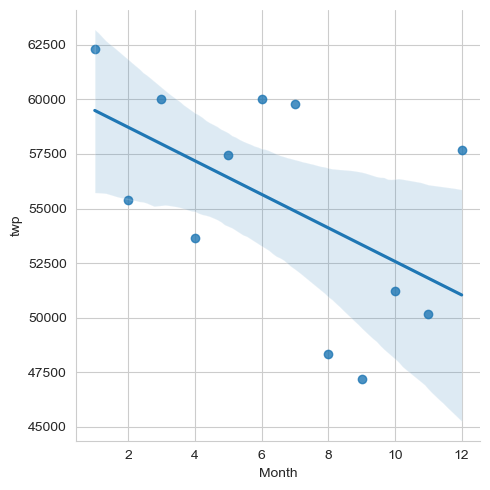

In [186]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

## Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method

In [189]:
data['date'] = data['timeStamp'].apply(lambda t : t.date())

In [191]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


#  Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls

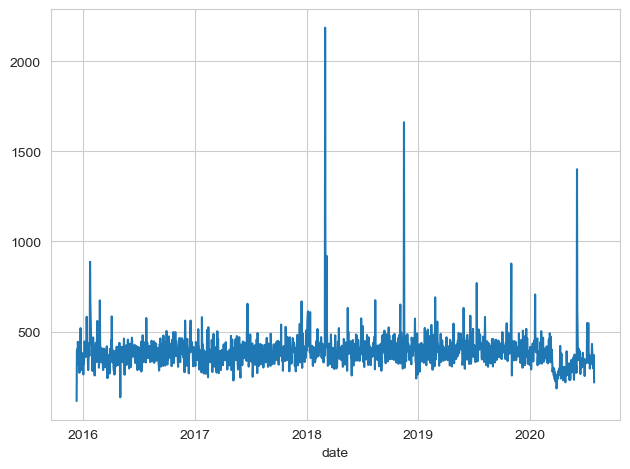

In [198]:
data.groupby('date').count()['twp'].plot()
plt.tight_layout()

## Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

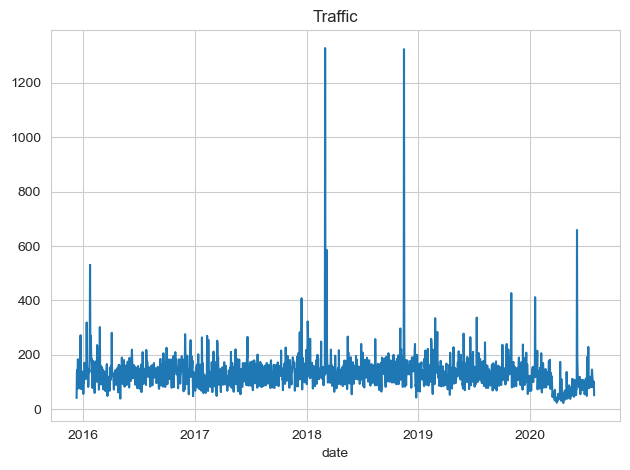

In [209]:
data[data['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

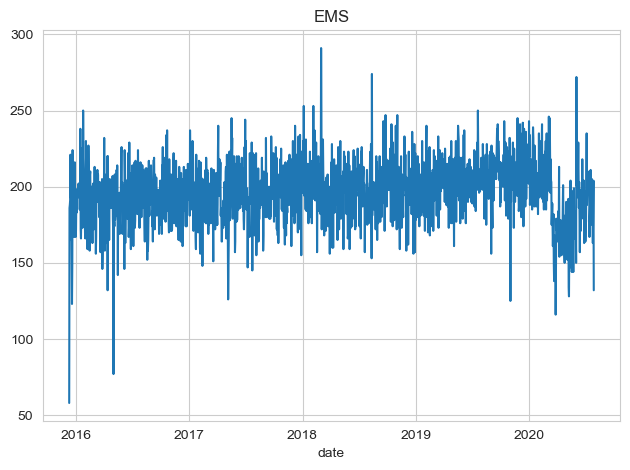

In [217]:
data[data['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

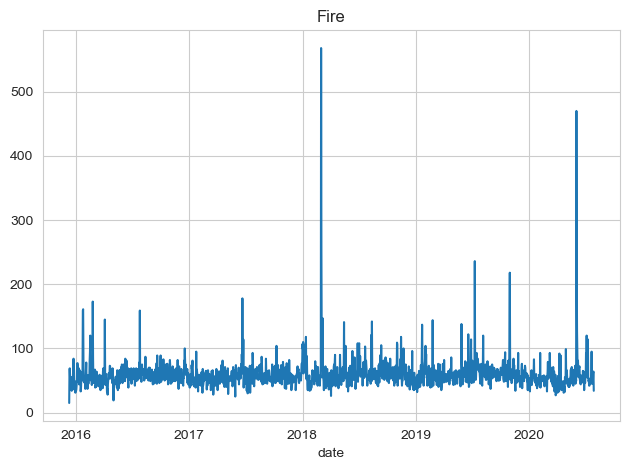

In [215]:
data[data['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method.

In [220]:
dayHour = data.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,5584,5843,5994,6181,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,5458,5632,5881,5664,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,4944,5450,5555,5378,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,4262,4438,4882,4654,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,5464,5492,5898,6173,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<Axes: xlabel='Hour', ylabel='Day of Week'>

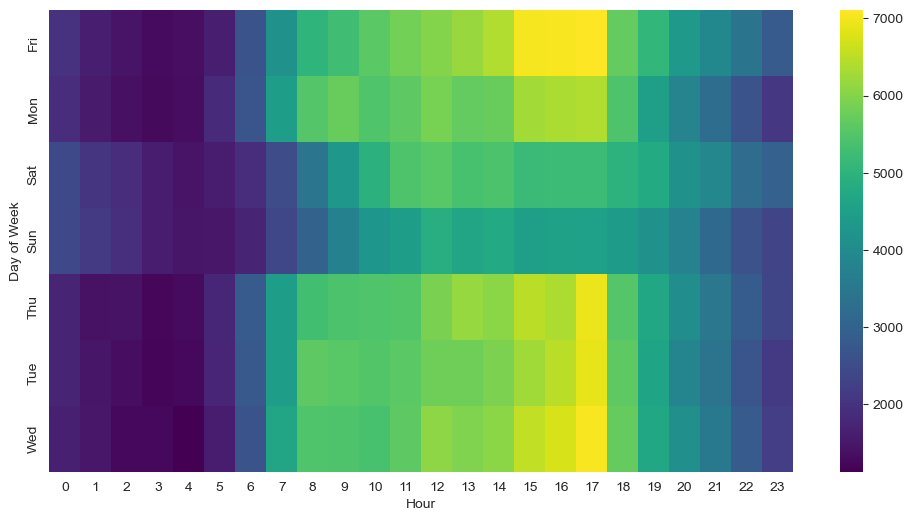

In [222]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

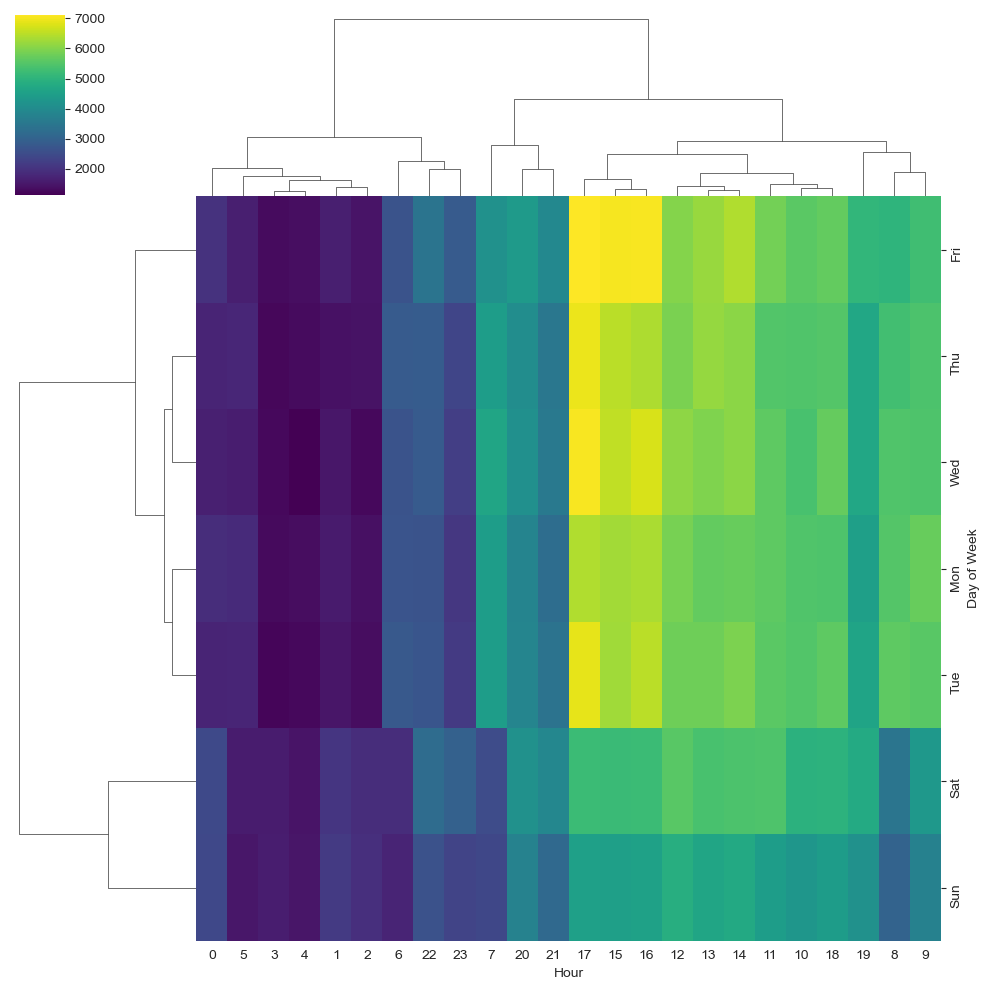

In [224]:
sns.clustermap(dayHour,cmap='viridis')

 Now repeat these same plots and operations, for a DataFrame that shows the Month as the column

In [233]:
dayMonth = data.groupby(by=['Day of Week','Month']).count()['reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<Axes: xlabel='Month', ylabel='Day of Week'>

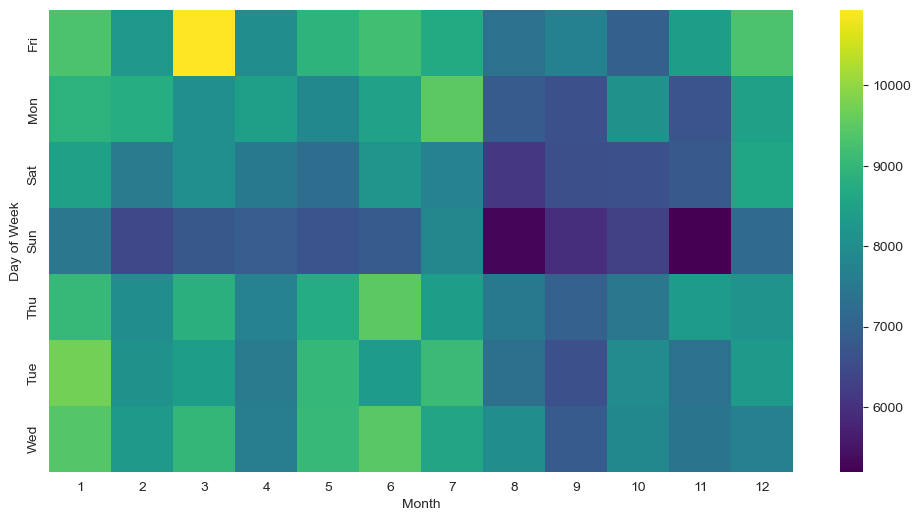

In [235]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

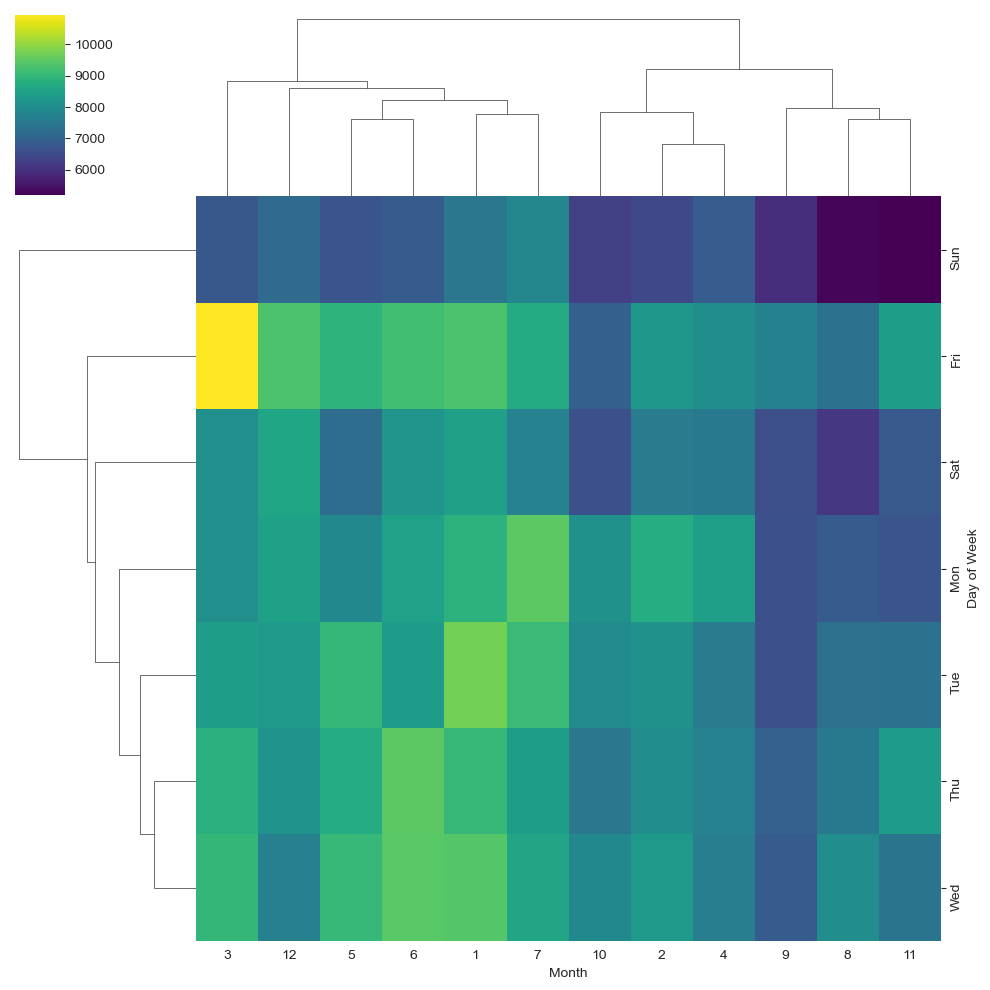

In [237]:
sns.clustermap(dayMonth,cmap='viridis')